# <center> PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle

## Знакомство с данными

### Первоначальная версия датасета содержит 17 полей со следующей информацией:

* _hotel_address_ — адрес отеля;
* _review_date_ — дата, когда рецензент разместил соответствующий отзыв;
* _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* _hotel_name_ — название отеля;
* _reviewer_nationality_ — страна рецензента;
* _negative_review_ — отрицательный отзыв, который рецензент дал отелю;
* _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв;
* _positive_review_ — положительный отзыв, который рецензент дал отелю;
* _review_total_positive_word_counts_ — общее количество слов в положительном отзыве.
* _reviewer_score_ — оценка, которую рецензент поставил отелю на основе своего опыта;
* _total_number_of_reviews_reviewer_has_given_ — количество отзывов, которые рецензенты дали в прошлом;
* _total_number_of_reviews_ — общее количество действительных отзывов об отеле;
* _tags_ — теги, которые рецензент дал отелю;
* _days_since_review_ — количество дней между датой проверки и датой очистки;
* _additional_number_of_scoring_ — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* _lat_ — географическая широта отеля;
* _lng_ — географическая долгота отеля.

In [1]:
import pandas as pd

hotels = pd.read_csv('D:\скилфэктори\КУРС DS\EDA\PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle\hotels.csv')
hotels.head(3)

<>:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
<>:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
C:\Users\Светлана\AppData\Local\Temp\ipykernel_5476\586472174.py:3: SyntaxWarning: "\E" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\E"? A raw string is also an option.
  hotels = pd.read_csv('D:\скилфэктори\КУРС DS\EDA\PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle\hotels.csv')


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Данные содержат 386803 значений. По типу в данных есть признаки с типом 'object', 'int', 'float', а также есть даты. При этом есть признаки с пропущенными значениями.    

## Очистка данных

In [3]:
# удалим признаки, которые содержат пропуски
hotels.drop(['lng', 'lat'],axis=1,inplace=True)

In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

## Проектирование признаков

### Признак _hotel_address_ — адрес отеля

In [5]:
# Из адреса отеля извлечем страну
hotels['hotels_country'] = hotels['hotel_address'].apply(lambda x: x.split()[-5] if 'United Kingdom' in x else x.split()[-2])
display(hotels[['hotel_address', 'hotels_country']])

,hotel_address,hotels_country
0,Stratton Street Mayfair Westminster Borough Lo...,London
1,130 134 Southampton Row Camden London WC1B 5AF...,London
2,151 bis Rue de Rennes 6th arr 75006 Paris France,Paris
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,Paris
4,Molenwerf 1 1014 AG Amsterdam Netherlands,Amsterdam
...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,London
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,Vienna
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,London
386801,31 Great Cumberland Place Westminster Borough ...,London


In [6]:
# Посмотрим какие страны и подсчитаем количество вхождений
hotels['hotels_country'].value_counts()

hotels_country
London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: count, dtype: int64

In [7]:
# создадим словарь для преобразования стран в числовые значения
country_mapping = {
    'London': 1, 
    'Barcelona': 2, 
    'Paris': 3,
    'Amsterdam': 4, 
    'Vienna': 5, 
    'Milan': 6
}

# применим преобразование
hotels['hotels_country_encoded'] = hotels['hotels_country'].map(country_mapping)
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,hotels_country,hotels_country_encoded
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,London,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,London,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,Paris,3


### Признак _hotel_name_ — название отеля

In [8]:
# Выведем количество уникальных названий отелей представленных в наборе данных
hotels['hotel_name'].value_counts()

hotel_name
Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
                                                     ... 
Ibis Styles Milano Palmanova                            7
Renaissance Paris Republique Hotel Spa                  7
Hotel Wagner                                            6
Hotel Gallitzinberg                                     6
Mercure Paris Porte d Orleans                           5
Name: count, Length: 1492, dtype: int64

В наборе данных очевидны топ-3 отеля — Britannia International Hotel Canary Wharf, Strand Palace Hotel, Park Plaza Westminster Bridge London. Возможно, это не случайность, и этот факт может повлиять на рейтинг. Выделим этот факт.

Можем создать новый бинарный 
* признак is_Britannia и присвоить ему 1 в случае, если это отель Britannia International Hotel Canary Wharf, иначе — 0; 
* признак is_Strand и присвоить ему 1 в случае, если это отель для Strand Palace Hotel, иначе — 0;
* признак is_Park_Plaza и присвоить ему 1 в случае, если это отель для Park Plaza Westminster Bridge London, иначе — 0.

In [9]:
hotels['is_Britannia'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Britannia International Hotel Canary Wharf' else 0)
hotels['is_Strand'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Strand Palace Hotel' else 0)
hotels['is_Park_Plaza'] = hotels['hotel_name'].apply(lambda x: 1 if x == 'Park Plaza Westminster Bridge London' else 0)
display(hotels.head(3))

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,hotels_country,hotels_country_encoded,is_Britannia,is_Strand,is_Park_Plaza
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,London,1,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,London,1,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,Paris,3,0,0,0


## Удалим признаки с типом object

In [10]:
# создаем списки столбцов по типу данных
object_col_name = list(hotels.select_dtypes(include='object').columns)
value_col_name = list(hotels.select_dtypes(include=['int', 'float']).columns)
data_col_name = list(hotels.select_dtypes(include=['datetime']).columns)

In [11]:
# удаляем нечисловые признаки
hotels = hotels.drop(columns=object_col_name)
hotels = hotels.drop(columns=data_col_name)

In [12]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   hotels_country_encoded                      386803 non-null  int64  
 8   is_Britannia                                386803 non-null  int64  
 9   is_Strand                                   386803 non-null  int64  
 

## Отбор признаков

### Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

<Axes: >

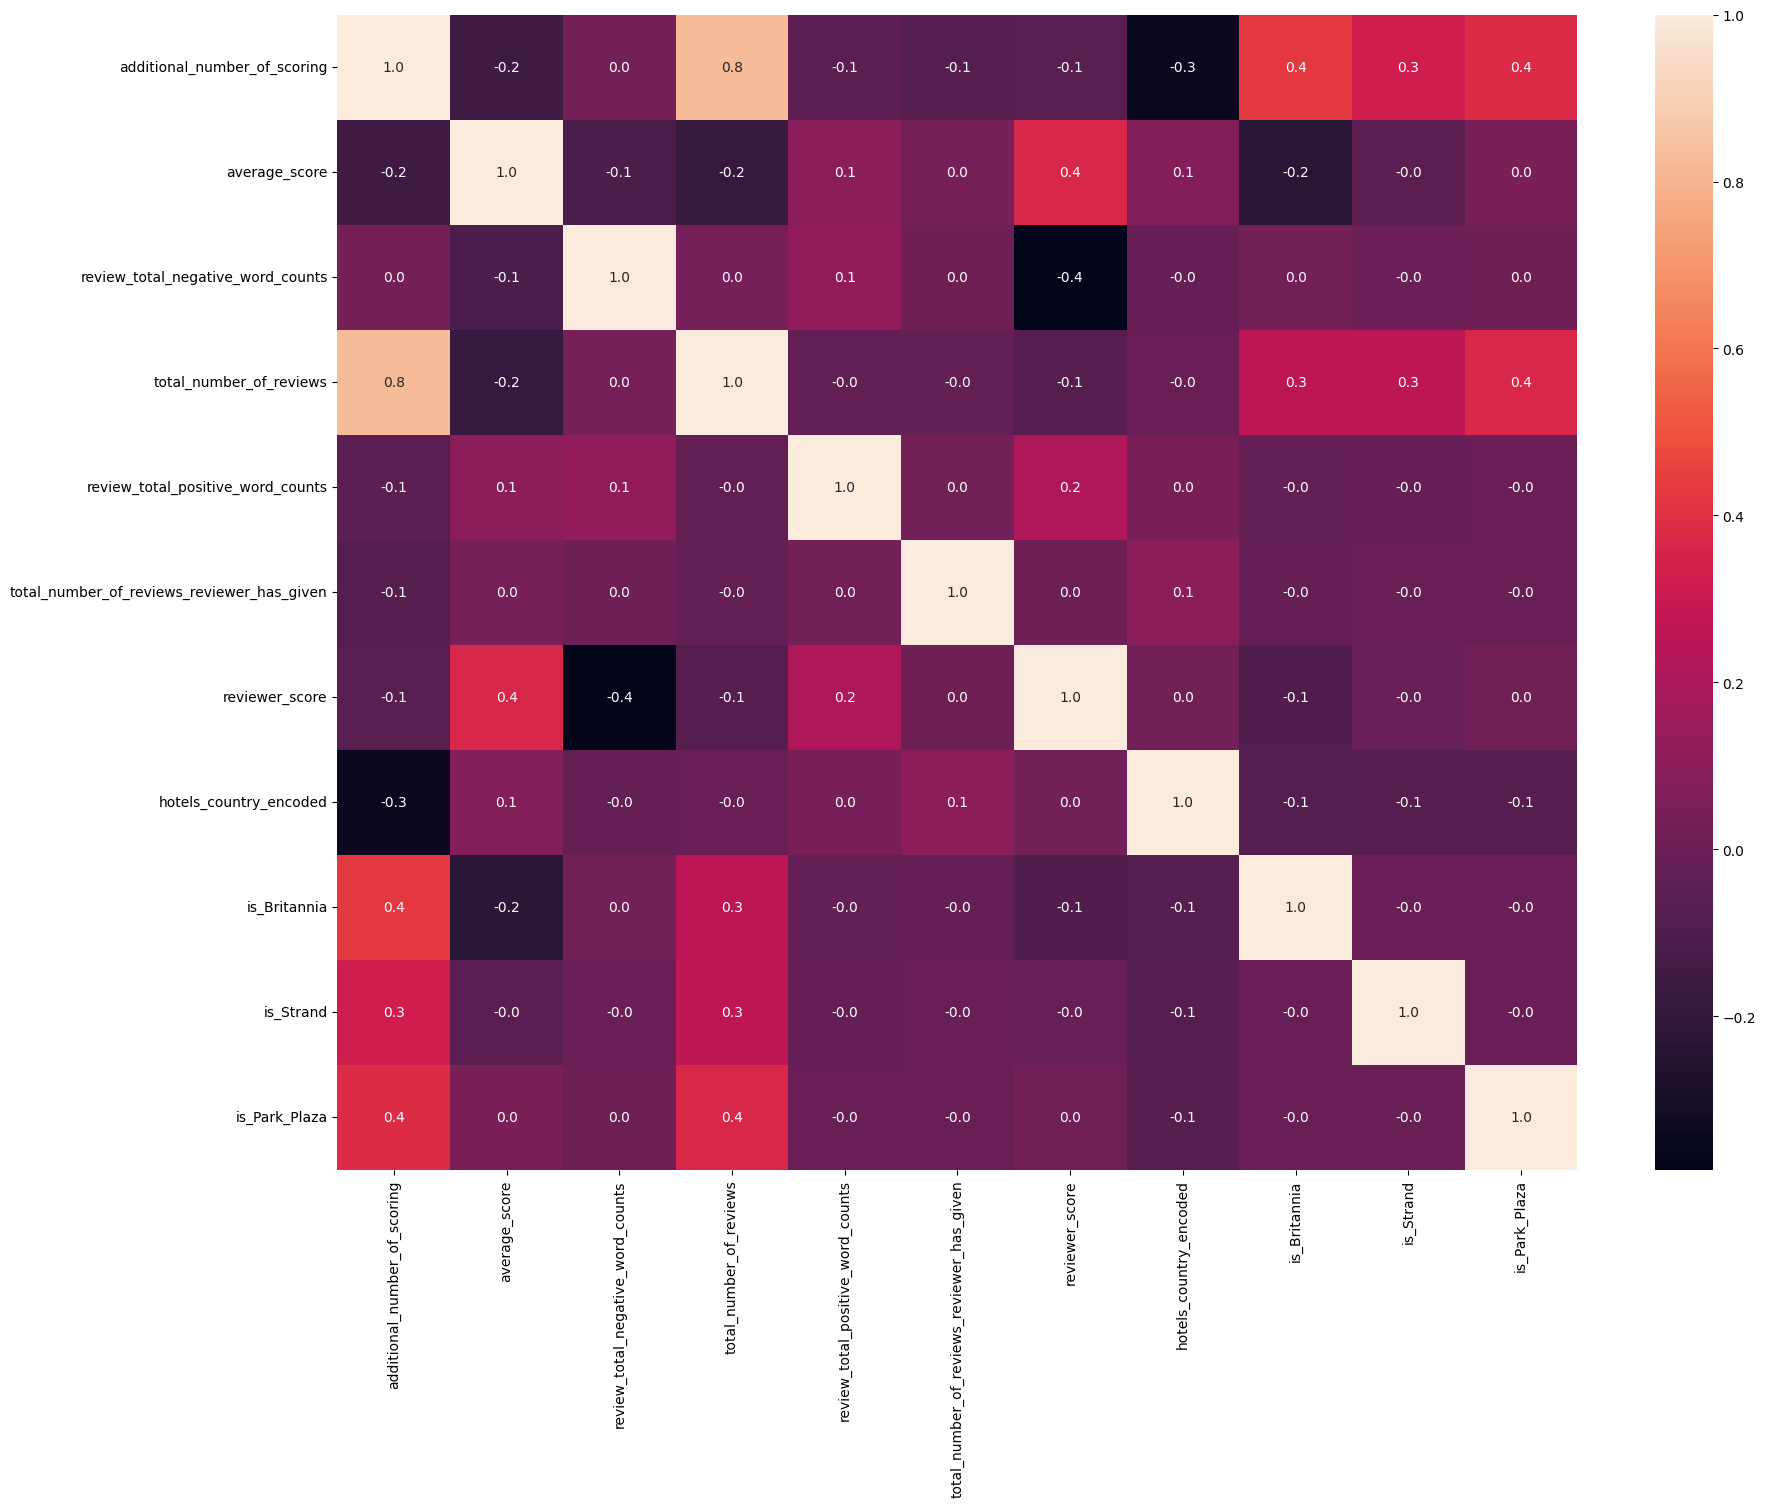

In [13]:
# проведём корреляционный анализ данных, чтобы определить зависимость признаков
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
ax = plt.figure(figsize=(20,15))
sns.heatmap(hotels.corr(numeric_only=True), annot=True, fmt='.1f')

In [14]:
# удалим признаки с сильной корреляцией
hotels.drop(['additional_number_of_scoring'],axis=1,inplace=True)

<Axes: >

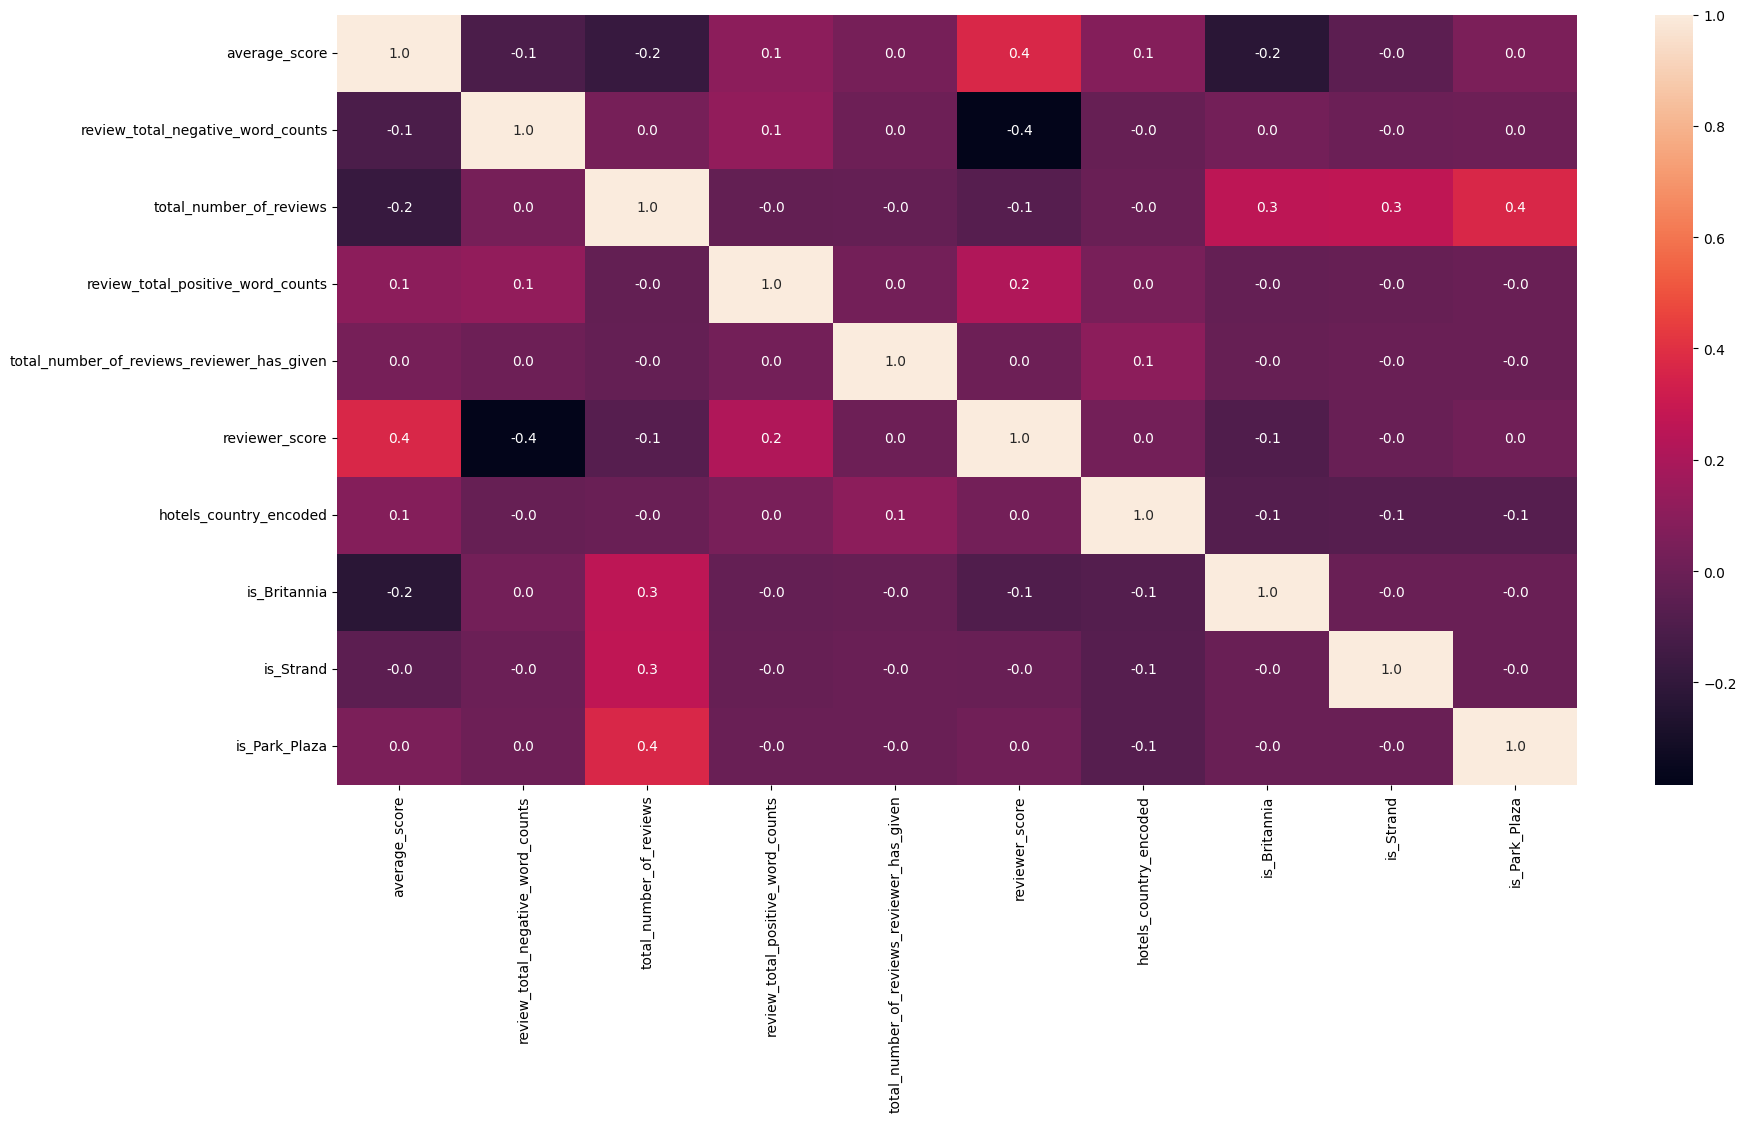

In [15]:
# проведём еще раз корреляционный анализ данных после удаления признаков, чтобы проверить их зависимость 
ax = plt.figure(figsize=(20,10))
sns.heatmap(hotels.corr(numeric_only=True), annot=True, fmt='.1f')

### _В результате получаем датасет, который содержит 13 полей со следующей информацией:_

* _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв;
* _total_number_of_reviews_ — общее количество действительных отзывов об отеле;
* _review_total_positive_word_counts_ — общее количество слов в положительном отзыве;
* _total_number_of_reviews_reviewer_has_given_ — количество отзывов, которые рецензенты дали в прошлом;
* _reviewer_score_ — оценка, которую рецензент поставил отелю на основе своего опыта;
* _hotels_country_encoded_ - закодированный признак страны;
* _is_Britannia_ - закодированный признак из топ-3 отелей, это отель Britannia International Hotel Canary Wharf; 
* _is_Strand_ -  закодированный признак из топ-3 отелей, это отель для Strand Palace Hotel;
* _is_Park_Plaza_ - закодированный признак из топ-3 отелей, это отель для Park Plaza Westminster Bridge London;
* _review_season_encoded_ - закодированный признак сезона, когда путешествовали и оставляли отзыв ('winter': 1, 'spring': 2, 'summer': 3, 'autumn': 4);
* _reviewer_continent_encoded_ — закодированные страны рецензента ('Europe': 1, 'Asia': 2, 'North America': 3, 'Oceania': 4, 'Africa': 5, 'South Аmerica': 6, 'Other': 7)

## Oценка значимости каждого признака для целевой переменной — рейтинг отеля

In [16]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

### Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.

Для начала разделим признаки по типу, перечислим их:

In [17]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score', 'is_Britannia', 'is_Strand', 'is_Park_Plaza', 'hotels_country_encoded']	

<Axes: >

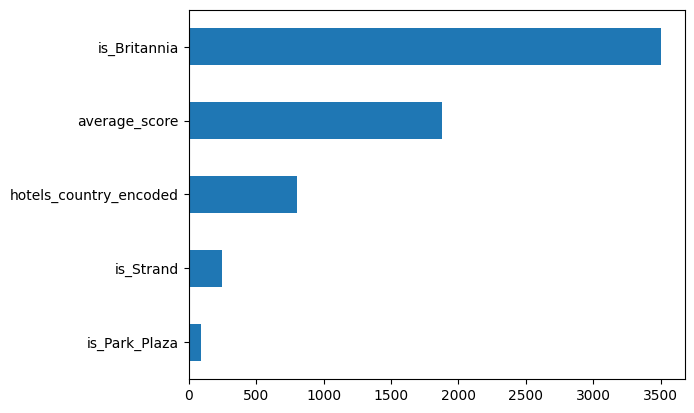

In [18]:
# Oценкa значимости категориальных переменных
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

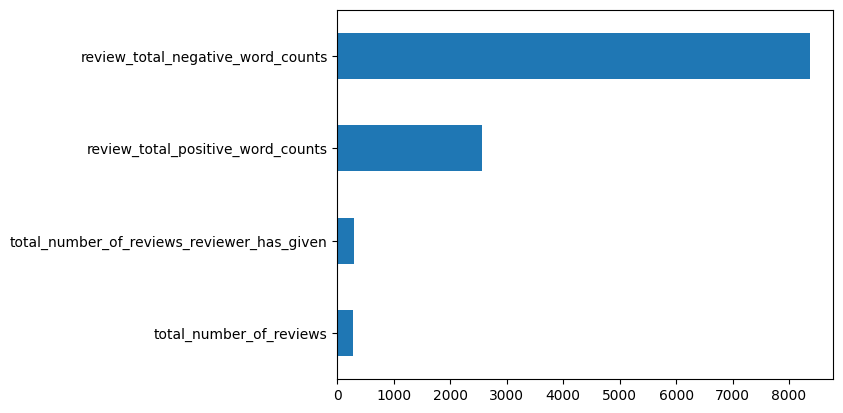

In [19]:
# Oценкa значимости непрерывных переменных
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Из оценки значимости категориальных признаков наиболее значимыми являются _is_Britannia_ - закодированный признак из топ-3 отелей, это отель Britannia International Hotel Canary Wharf и _average_score_ — средний балл отеля, рассчитанный на основе последнего комментария за последний год.

Из оценки значимости числовых признаков наиболее значисмым является _review_total_negative_word_counts_ — общее количество слов в отрицательном отзыв

Попробуем оставить только наиболее значимые признаки

In [20]:
# непрерывные признаки
num_cols = ['review_total_negative_word_counts', 'review_total_positive_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'is_Britannia', 'hotels_country_encoded']	

<Axes: >

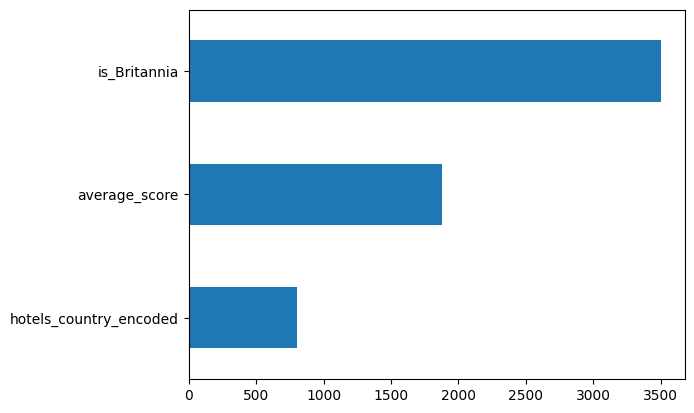

In [21]:
# Oценкa значимости категориальных переменных
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

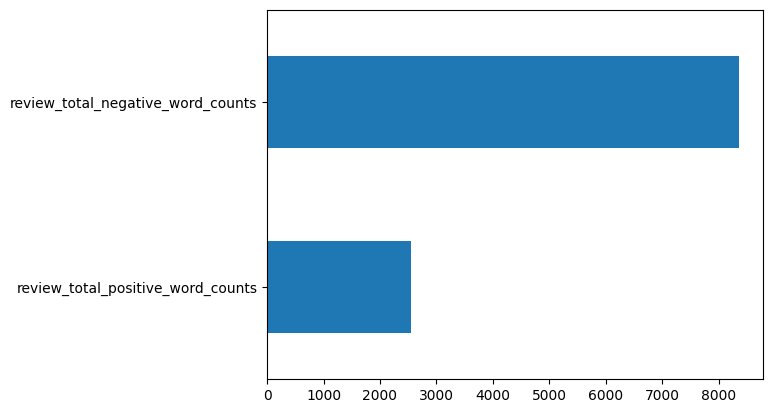

In [22]:
# Oценкa значимости непрерывных переменных
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

## Обучение модели

In [23]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [24]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [26]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1673871671630568
